# Laboratorio 3.1: Clustering

**Autores:** Hernán Sarmiento, Andrés Abeliuk, Alison Fernandez, Cinthia Mabel Sanchez, Johnny Godoy, Gabriel Ramos, Cristian Llull y Matías Rojas

**Fecha:** Octubre 2021

## ============= Declaración de compromiso ético =============

Nosotros Ignacio Díaz y Millaray Valdivia, declaramos que realizamos de manera grupal los pasos de la presente actividad. También declaramos no incurrir en copia, ni compartir nuestras respuestas con otras personas ni con otros grupos. Por lo que, ratificamos que las respuestas son de nuestra propia confección y reflejan nuestro propio conocimiento.


# Instrucciones


1. Trabajen en equipos de dos personas. Salvo excepciones, no se corregirá entregas con menos de dos integrantes.

2. Modifiquen este archivo `.ipynb` agregando sus respuestas donde corresponda. 

3. Cuando finalicen el laboratorio, **generen un archivo HTML** usando jupyter (ver tutorial 2) y súbanlo a U-Cursos. El laboratorio debe ser entregado sólo por 1 integrante. Si se entrega por más de un integrante, se revisará cualquiera de éstos.

# Estructura del laboratorio

Este laboratorio consiste en 2 partes. La primera son preguntas teóricas en las que no necesita escribir código y corresponden a materia vista en clases. La segunda es una sección introductoria para familiarizarse con métodos de clustering.

# Parte 1: Teoría


**1.** Explique para qué se usan los algoritmos de clustering.

>**Respuesta:** Los algoritmos de clustering se usan para encontrar agrupaciones naturales en los datos, que llamamos clusters, y describir sus propiedades. La idea es encontrar agrupamientos útiles y significativos para caracterizar grupos naturales dentro de un conjunto de datos.

**2.** Explique cómo encontrar outliers en los siguientes métodos de clustering:

>**Respuesta:** 
- K-Means: Podemos elegir los outliers como los puntos dentro de un cluster con mayor SSE al centroide del mismo cluster, pues el SSE es una medida de distancia entre el centroide y el punto. K-Means no es tan robusto a outliers porque el punto que estamos considerando como outlier podría ser un punto de otro cluster que fue mal asignado por un clustering poco efectivo.
- Clustering Jerárquico Aglomerativo: Se pueden reconocer outliers como singletons en los dendogramas del cluster jerárquico aglomerativo, es decir al crear el gráfico "single" que representa la distancias mínimas entre los cluster, si hay un cluster en el que esta es mayor no se va a ir uniendo a los otros cluster a medida que se van juntando, por lo que quedará apartado hasta que se llegue a un solo cluster para todos los datos, y por lo tanto es un outlier.

# Parte 2: Clustering

Para esta parte usaremos el dataset de cantidad de denuncias por 100 mil habitantes por tipo de delito desde el año 2001 al 2016 en Chile (Fuente: http://www.seguridadpublica.gov.cl/estadisticas/tasa-de-denuncias-y-detenciones/delitos-de-mayor-connotacion-social-series-de-datos-2001-2017/).

Ejecute el siguiete código para cargar el dataset:

In [6]:
import pandas as pd
import numpy as np

dataframe = pd.read_csv("https://users.dcc.uchile.cl/~hsarmien/mineria/datasets/denuncias-2001-2016.txt", sep=" ")
dataframe

,comuna,anio,homicidios,hurtos,robo_lugar,robo_sorpresa,robo_vehiculo,robo_violencia,violacion
1,Arica,2001,1.6,370.3,NaN,9.5,NaN,107.2,16.4
2,Arica,2002,1.1,346.7,NaN,34.0,NaN,122.8,14.9
3,Arica,2003,1.6,460.1,464.4,52.8,172.2,196.2,15.5
4,Arica,2004,1.1,452.2,395.0,64.1,203.7,143.8,13.9
5,Arica,2005,0.0,421.8,287.8,58.4,144.2,144.7,7.5
...,...,...,...,...,...,...,...,...,...
5532,Peñaflor,2012,1.1,375.0,436.5,78.6,59.3,191.5,14.8
5533,Peñaflor,2013,0.0,370.0,408.1,107.6,77.4,213.0,14.6
5534,Peñaflor,2014,1.1,301.3,376.3,112.6,65.1,224.0,5.5
5535,Peñaflor,2015,0.0,321.6,334.7,111.9,73.9,199.9,7.6


Utilizaremos sólo los datos del 2006. Ejecute las siguientes líneas de código para filtrar los datos:

In [7]:
X = dataframe[dataframe["anio"] == 2006]
X = X.drop(columns=["comuna", "anio"])
X

,homicidios,hurtos,robo_lugar,robo_sorpresa,robo_vehiculo,robo_violencia,violacion
6,1.1,507.5,320.3,60.9,89.0,161.2,8.6
22,0.0,68.0,0.0,0.0,0.0,0.0,0.0
38,0.0,834.9,256.9,0.0,0.0,0.0,64.2
54,0.0,81.2,81.2,0.0,0.0,0.0,0.0
70,0.6,680.3,327.2,211.5,169.7,287.0,18.2
...,...,...,...,...,...,...,...
5462,2.8,359.0,451.3,44.0,27.0,293.8,5.7
5478,3.4,233.4,375.4,27.1,6.8,60.9,6.8
5494,3.4,332.7,492.3,23.8,20.4,71.3,3.4
5510,0.0,263.6,529.3,57.1,22.0,235.0,11.0


## K-Means

**1.** Cuando usamos K-Means debemos definir previamente el número de clusters que queremos generar. Teniendo en cuenta estos datos, implemente un método que nos permita determinar cuántos clusters usar.

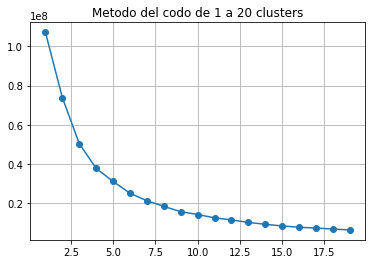

In [8]:
# Respuesta

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


def n_clusters_plot(X, n_cluster):
    sse = []

    clusters = list(range(1, n_cluster))
    for k in clusters:
        kmeans = KMeans(n_clusters=k).fit(X)
        sse.append(kmeans.inertia_)

    plt.plot(clusters, sse, marker="o")
    plt.title(f"Metodo del codo de 1 a {n_cluster} clusters")
    plt.grid(True)
    plt.show()

    
n_clusters_plot(X, 20)

**2.** Cuántos clusters propone usar para este dataset? Justifique su elección.

> **Respuesta:** 
Analizando el gráfico, notamos que las diferencias entre un cluster y 4 son significativas, luego, entre 4 y 5 baja pero sigue siendo importante, también entre 5 y 6, pero entre 6 y 7 la ganancia es muy pequeña (se puede ver en la pendiente de ese tramo), por lo que escogemos 6 clusters.

**3.** Entrene un modelo de K-Means usando el número de clusters que eligió en la pregunta anterior e imprima las asignaciones de clusters para cada dato.

In [9]:
# Respuesta

n_cluster = 6
kmeans = KMeans(n_clusters=n_cluster, n_init=200, max_iter=30000)
kmeans.fit(X) # fit retorna a self
y_pred = kmeans.predict(X)
kmeans.labels_

array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 4, 0, 1, 0, 1, 1, 0, 4, 1, 1, 1, 4,
       1, 1, 1, 0, 0, 0, 0, 4, 4, 0, 0, 1, 1, 1, 0, 4, 0, 1, 0, 0, 0, 0,
       4, 1, 1, 0, 1, 4, 4, 4, 1, 0, 0, 0, 4, 0, 4, 0, 4, 1, 1, 0, 0, 0,
       4, 3, 3, 3, 3, 4, 4, 1, 4, 1, 1, 0, 4, 1, 1, 1, 4, 1, 1, 0, 1, 4,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 4, 0, 1, 0, 0, 0, 4, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 4, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 4, 1,
       1, 1, 0, 0, 1, 4, 1, 1, 4, 0, 4, 0, 0, 4, 1, 0, 1, 1, 1, 1, 4, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 4, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 4, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       1, 4, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 4, 4, 1, 0, 0, 0, 4, 0,
       4, 1, 1, 1, 0, 0, 0, 1, 1, 1, 4, 4, 0, 1, 4, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 4, 4, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 2, 5, 0, 5, 5, 5, 5,

**4.** Al ejecutar el código anterior (pregunta 3) varias veces, obtenemos resultados diferentes. ¿Cómo podría evitar los resultados variables de K-means? Presente al menos 2 opciones para lograr esto. Puede implementarlo o describirlo.

> **Respuesta:**
Primero, podemos aumentar el número máximo de iteraciones (max_iter) que se hace dentro de un experimento, esto aumentará las probabilidades de que el algoritmo llegue a una convergencia. 
Segundo, podemos aumentar el número de experimentos (n_init), ya que esto aumentará las probabilidades de que los puntos elegidos aleatoriamente para ser centroides estén mejor posicionados en la iteración inicial, y por lo tanto, converjan a un mejor resultado. 
Aumentar estas dos formas de correr el modelo ayudan a que los resultados converjan a un mejor rendimiento y, por lo tanto, se parezcan más en diferentes corridas.

**5.** Ejecute el siguiente código que bajará la dimensionalidad de los datos de 7 a 2. Grafique los datos transformados y pinte los gráficos para tener una representación visual de los clusters.

In [10]:
from sklearn.decomposition import PCA

new_X = PCA(n_components=2, random_state=0).fit_transform(X)

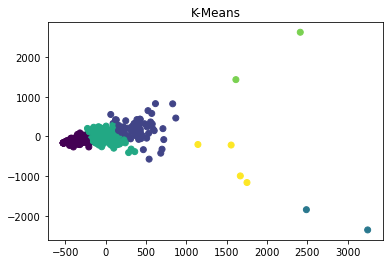

In [11]:
# Respuesta

kmeans = KMeans(n_clusters=6).fit(new_X)

plt.scatter(new_X[:, 0], new_X[:, 1], c=kmeans.labels_)
plt.title("K-Means")
plt.show()

## Clustering Jerárquico Aglomerativo

**1.** Usando los datos anteriores, ejecute cada uno de los 4 métodos de clustering jerárquico: complete, single, average y ward, y visualice los dendrogramas formados. Adjunte el código necesario. No necesita generar los 4 dendrogramas en el mismo gráfico, pueden ser distintos.

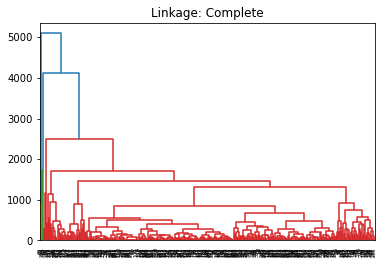

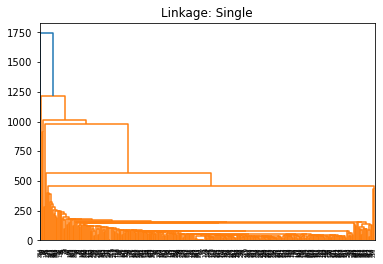

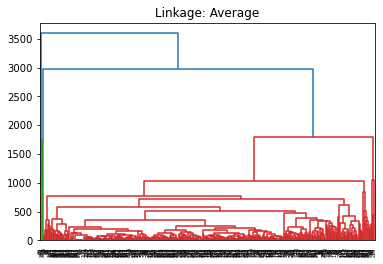

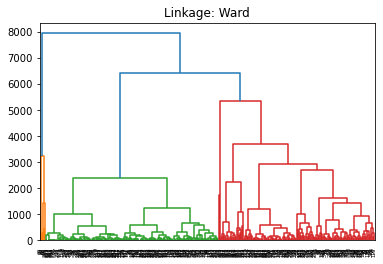

In [20]:
# Respuesta

from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

complete = linkage(X, method="complete")
single = linkage(X, method="single")
average = linkage(X, method="average")
ward = linkage(X, method="ward")

dendrogram(complete)
plt.title("Linkage: Complete")
plt.show()

dendrogram(single)
plt.title("Linkage: Single")
plt.show()

dendrogram(average)
plt.title("Linkage: Average")
plt.show()

dendrogram(ward)
plt.title("Linkage: Ward")
plt.show()

**2.** Fijándose en el método `single`, "visualmente" cuántos clusters propone usar? A qué altura recomendaría cortar el árbol?

> **Respuesta:** Visualmente consideramos que con 5 clusters según ward queda razonable, se podría cortar en 750 por ser la mitad.

**3.** Ahora si miramos el método `ward`, "visualmente" cuántos clusters propone usar? A qué altura se debe cortar el arbol para obtener esa cantidad de clusters?

> **Respuesta:** Nuevamente consideramos que con 4 clusters queda razonable usando análisis visual, aquí se podría cortar en 4200 para que sea la mitad de la región.

**4.** Implemente el código para asignar clusters a los datos siguiendo lo que usted propuso en la pregunta **2** y **3** y liste la asignación de clusters para cada punto del dataset para `single` y `ward`. Cuántos clusters se generan para el método `single` cortando a la altura que propuso en la pregunta **2**?

In [14]:
# Respuesta
ward_dist = AgglomerativeClustering(n_clusters=None, linkage="ward", distance_threshold=4200).fit(X)
print("- Ward")
print("Cantidad de clusters (ward): " + str(ward_dist.n_clusters_))
print("Asignación de clusters para cada punto (Ward):")
print(ward_dist.labels_)

single_dist = AgglomerativeClustering(n_clusters=None, linkage="single", distance_threshold=750).fit(X)
print("- Single")
print("Cantidad de clusters (single): " + str(single_dist.n_clusters_))
print("Asignación de clusters para cada punto (Single):")
print(single_dist.labels_)

- Ward
Cantidad de clusters (ward): 4
Asignación de clusters para cada punto (Ward):
[0 2 0 2 0 0 2 2 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 2 2 2 2 0 0 2 2 0 2 2 2
 0 2 2 2 2 2 2 0 0 0 2 2 0 0 0 0 2 2 2 0 2 0 2 1 2 0 2 2 2 0 1 1 1 1 0 0 0
 0 2 2 2 0 0 0 0 0 2 0 2 0 0 2 0 0 2 2 0 2 2 0 0 0 0 2 2 2 2 2 0 2 2 2 2 2
 2 2 2 0 0 0 0 0 2 2 0 2 2 2 0 2 2 0 2 0 0 2 2 2 2 0 0 0 2 0 2 0 2 2 0 0 2
 2 2 0 2 0 2 2 2 0 0 0 0 0 0 2 0 0 2 2 2 2 2 2 2 2 2 0 2 2 2 0 2 2 0 2 2 2
 2 2 2 2 2 2 0 2 2 2 2 2 2 0 0 0 2 2 2 2 0 0 0 2 0 0 2 0 1 2 2 2 2 0 2 0 0
 2 2 2 2 2 0 2 0 0 0 2 0 0 0 2 0 0 2 0 2 0 0 0 2 2 2 2 2 2 0 0 0 2 2 2 2 2
 0 2 0 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 2 0 0 2 0 2 0 2 2 2 2 2 0 0 2 0 2 3 0
 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 3 2 0 0 0 0 0 0 0 0 0 2 0 0 0 2 0
 2 0 2 0 2 0 2 2 0 2 0 0 0]
- Single
Cantidad de clusters (single): 6
Asignación de clusters para cada punto (Single):
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

**5.** Cuántos datos quedan asignados a cada cluster? Agregue el código necesario para objener esta información para los métodos `single` y `ward`.

In [18]:
# Respuesta
counts_ward = np.bincount(ward_dist.labels_)
print("- Datos asignados a cada cluster en ward: ")

count=0
for i in counts_ward:
    print(f'cluster #{count}: {i} datos asignados')
    count += 1

print()
    
counts_single = np.bincount(single_dist.labels_)
print("- Datos asignados a cada cluster en single: ")
count=0
for i in counts_single:
    print(f'cluster #{count}: {i} datos asignados')
    count += 1

- Datos asignados a cada cluster en ward: 
cluster #0: 159 datos asignados
cluster #1: 6 datos asignados
cluster #2: 179 datos asignados
cluster #3: 2 datos asignados

- Datos asignados a cada cluster en single: 
cluster #0: 340 datos asignados
cluster #1: 2 datos asignados
cluster #2: 1 datos asignados
cluster #3: 1 datos asignados
cluster #4: 1 datos asignados
cluster #5: 1 datos asignados


**6.** Usando el dataset con dimensiones reducidas generado en la parte K-means, pregunta **5**: `new_X`, grafique los datos y pinte los datos con su asignacion de cluster para los métodos `single` y `ward` para tener una representación visual de los clusters.

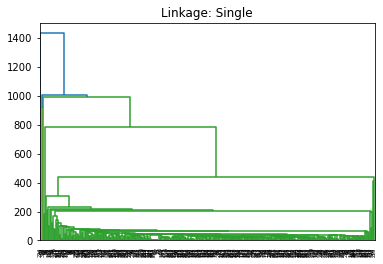

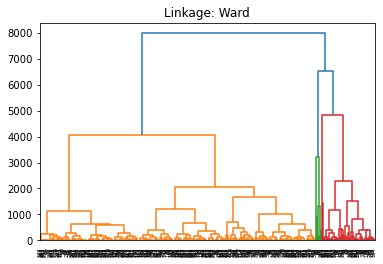

In [19]:
# Respuesta

single_new = linkage(new_X, method="single")
ward_new = linkage(new_X, method="ward")

dendrogram(single_new)
plt.title("Linkage: Single")
plt.show()

dendrogram(ward_new)
plt.title("Linkage: Ward")
plt.show()

## Análisis

**1.** Seleccione alguno de los métodos de clustering aplicados anteriormente e interprete los clusters obtenidos. 
* a) ¿Qué puede decir de los clusters generados? 
* b) ¿Existen patrones de agrupación?

> **Respuesta**

Tomando en cuenta k-means

A) siempre tienden a reconocer un cluster grande (que a veces se divide en dos o tres para un k muy alto) y luego agrupo los puntos aislados de ese cluster como nuevos clusters, pero más parecen outliers. Dichos outliers se ven en el gráfico (con la transformación a dos dimensiones) y se reconoce que son pocos en comparación con los agrupados en el cluster grande, además de estar esparcidos.

B) Sí, tiende a agrupar siempre el mismo cluster grande y luego para k muy altos, divide los outliers en pequeños clusters o termina dividiendo el cluster en partes. Este cluster grande tiende a tener los datos muy cerca uno de otros. Cuando se divide el cluster grande es porque los centroides aleatorios quedan muy cercanos al cluster grande y comienzan a gravitarlo.